In [37]:
import pandas as pd

In [38]:
cereal = pd.read_excel("/content/drive/MyDrive/통계학개론_오태훈/퀴즈/quizdata2206511.xlsx",
                     sheet_name='cereal')
cereal.head()

,Group,Spend
0,1,14.77
1,2,8.15
2,2,8.00
3,4,9.31
4,2,12.09


# 2. 시리얼 구입비용 차이

## 아침으로 시리얼을 구입하는 고객 1,250명을 대상으로 시리얼 구입할 때 고려하는 이유와 1)건강음식을 위하여 2) 다이어트 효과 3) 식이요법 4) 가격고려 구입 가격을 조사하였다.

## 건강음식, 식이요법 구입 이유와 구입 비용 차이가 있는지 유의수준 5%에서 검정하시오.

In [66]:
cereal.pivot_table(index="Group", values="Spend", aggfunc={"mean", 'std'})

,mean,std
Group,,
1,11.579257,3.045871
2,10.145888,3.218732
3,16.222780,3.108068
4,6.147656,1.839874


In [40]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   1250 non-null   int64  
 1   Spend   1250 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 19.7 KB


In [41]:
# 기초통계량
cereal.groupby(by='Group').describe()['Spend']

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
1,269.0,11.579257,3.045871,3.07,9.6200,11.630,13.5600,20.31
2,484.0,10.145888,3.218732,0.67,7.8800,10.170,12.2925,19.04
3,241.0,16.222780,3.108068,7.59,14.3100,16.190,18.4600,24.29
4,256.0,6.147656,1.839874,1.70,4.8675,6.035,7.3625,12.24


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



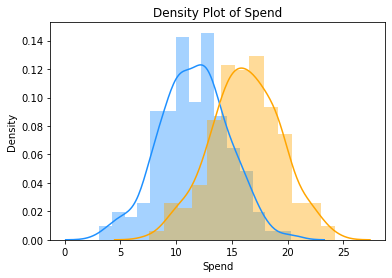

In [42]:
#히스토그램
import matplotlib.pyplot as plt
import seaborn as sns
df = cereal
sns.distplot(df.loc[df['Group']==1,"Spend"],color="dodgerblue", label="health")
sns.distplot(df.loc[df['Group']==3,"Spend"],color="orange", label="diet")
plt.title('Density Plot of Spend')
plt.show()

In [43]:
#상자수염 그림
import plotly.express as px
fig = px.histogram(cereal, x='Spend',
color='Group',marginal="box",histnorm='probability')
fig.show()

In [53]:
cereal['Spend']

0       14.77
1        8.15
2        8.00
3        9.31
4       12.09
        ...  
1245    19.78
1246     6.57
1247     9.44
1248     8.33
1249    14.88
Name: Spend, Length: 1250, dtype: float64

In [57]:
ds1=cereal[cereal['Group']==1]
ds3=cereal[cereal['Group']==3]

In [52]:
cereal.iloc[:,1]

0       14.77
1        8.15
2        8.00
3        9.31
4       12.09
        ...  
1245    19.78
1246     6.57
1247     9.44
1248     8.33
1249    14.88
Name: Spend, Length: 1250, dtype: float64

In [61]:
#등분산 검정 "귀무가설: 두 모집단의 분산은 동일하다."
import scipy.stats as st
ts,pvalue=st.levene(ds1["Spend"],ds3['Spend'])
print('등분산 검정통계량=%.2f 유의확률=%.3f' %(ts,pvalue))
#유의확률=0.739이므로 귀무가설 채택 등분산 만족

등분산 검정통계량=0.11 유의확률=0.739


In [64]:
#독립집단 모평균 차이 검정 "귀무가설 : 두 모집단의 평균은 동일하다."
import scipy.stats as stat
ts,p_value=stat.ttest_ind(ds1['Spend'],ds3['Spend'],equal_var=True)
print('검정통계량=%.2f, 유의확률=%.6f)' %(ts,p_value/2))
#유의확률<0.001이므로 귀무가설 기각, 다이어트로 구입하는 시리얼 가격이 더 높다

검정통계량=-17.02, 유의확률=0.000000)


3번으로 인한 구매와 4번으로 인한 구매 구입가격으로 인한 차이가 있는지 유의수준 5%로 검정하시오.

In [67]:
# 기초통계량
cereal.groupby(by='Group').describe()['Spend']

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
1,269.0,11.579257,3.045871,3.07,9.6200,11.630,13.5600,20.31
2,484.0,10.145888,3.218732,0.67,7.8800,10.170,12.2925,19.04
3,241.0,16.222780,3.108068,7.59,14.3100,16.190,18.4600,24.29
4,256.0,6.147656,1.839874,1.70,4.8675,6.035,7.3625,12.24


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



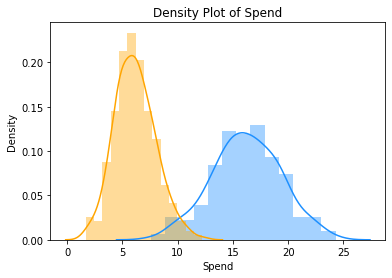

In [68]:
#히스토그램
import matplotlib.pyplot as plt
import seaborn as sns
df = cereal
sns.distplot(df.loc[df['Group']==3,"Spend"],color="dodgerblue", label="3")
sns.distplot(df.loc[df['Group']==4,"Spend"],color="orange", label="4")
plt.title('Density Plot of Spend')
plt.show()

In [69]:
ds3=cereal[cereal['Group']==3]
ds4=cereal[cereal['Group']==4]

In [80]:
#등분산 검정 "귀무가설: 두 모집단의 분산은 동일하다."
import scipy.stats as st
ts,pvalue=st.levene(ds3["Spend"],ds4['Spend'])
print('등분산 검정통계량=%.2f 유의확률=%.5f' %(ts,pvalue))
#유의확률<0.001이므로 귀무가설 기각 등분산 만족하지 않는다

등분산 검정통계량=56.96 유의확률=0.00000


In [88]:
#등분산 검정_확인
import scipy.stats as st
st.levene(ds3['Spend'],ds4['Spend'])

LeveneResult(statistic=56.95732338747844, pvalue=2.1551749031001121e-13)

In [89]:
#독립집단 모평균 차이 검정 "귀무가설 : 두 모집단의 평균은 동일하다."
import scipy.stats as stat
ts,p_value=stat.ttest_ind(ds3['Spend'],ds4['Spend'],equal_var=True)
print('검정통계량=%.2f, 유의확률=%.5f)' %(ts,p_value/2))
#유의확률<0.001이므로 귀무가설 기각, 3번으로 구매하는 가격보다 4번으로 구입하는 시리얼 가격이 더 높다.

검정통계량=44.28, 유의확률=0.00000)


In [90]:
#독립집단 모평균 차이 검정_확인
import scipy.stats as stat
stat.ttest_ind(ds3['Spend'],ds4['Spend'],equal_var=True)

Ttest_indResult(statistic=44.27702254072782, pvalue=2.885487412633104e-174)

# 3.

In [94]:
ambulance = pd.read_excel("/content/drive/MyDrive/통계학개론_오태훈/퀴즈/quizdata2206511.xlsx",
                     sheet_name='ambulance')
ambulance.head()

,id,Ambulance,Fire
0,1,13.44,8.27
1,2,18.93,11.64
2,3,15.24,11.03
3,4,19.15,12.37
4,5,13.42,10.44


In [99]:
# 새로운 변수 만들기
ambulance['차이'] = ambulance['Ambulance']-ambulance['Fire']
ambulance.head()

,id,Ambulance,Fire,차이
0,1,13.44,8.27,5.17
1,2,18.93,11.64,7.29
2,3,15.24,11.03,4.21
3,4,19.15,12.37,6.78
4,5,13.42,10.44,2.98


In [102]:
ambulance['차이'].mean()

2.219714285714285

In [103]:
ambulance['차이'].describe()

count    280.000000
mean       2.219714
std        3.139724
min       -8.070000
25%        0.187500
50%        2.705000
75%        4.075000
max       11.070000
Name: 차이, dtype: float64

In [98]:
#모평균 가설검정 "귀무가설 : 시간차이는 1분이다."
import scipy.stats as st
st.ttest_1samp(ambulance['차이'],1)
# 유의확률은 < 0.001이므로 귀무가설 기각, 소방차와 응급차의 시간차이는 1분 이상이다.

Ttest_1sampResult(statistic=6.500483466658579, pvalue=3.677424636688157e-10)